# Image Classification with CNN

For the training model we are using Python(tf-env)

1) DATA PROCESSING

1.1 Importing the necessary libraries to load the data. The dataset is split into several small files (like 5 little folders of images)

1.2 Reshape the images. The pictures are originally stored as long rows of numbers (not real images yet). This code will rearrange the numbers into real 32 x 32 pixel images with color channels (red, green, blue).

1.3 Organized the labels. Each image needs a label, so it tells the computer what it´s looking at. 

1.4 Return training and test data. 2 organized sets. 
Training set: train_images, train_labels
Test set: test_images, test_labels

In [13]:
import os
import pickle
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

def load_cifar_batch(filename):
    with open(filename, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')
        images = batch['data']
        labels = batch['labels']
        images = images.reshape((len(images), 3, 32, 32)).transpose(0, 2, 3, 1)
        return images, labels

def load_cifar10(data_dir):
    train_images = []
    train_labels = []

    for i in range(1, 6):
        file = os.path.join(data_dir, f"data_batch_{i}")
        images, labels = load_cifar_batch(file)
        train_images.append(images)
        train_labels.append(labels)

    train_images = np.concatenate(train_images)
    train_labels = np.concatenate(train_labels)

    test_images, test_labels = load_cifar_batch(os.path.join(data_dir, "test_batch"))

    return (train_images, train_labels), (test_images, test_labels)


1.5 Loading the dataset from disk. This way we specify the path to the CIFAR-10 data folder on my computer

In [14]:
data_path = r"C:\Users\macat\OneDrive\05_IronHack\Image Classification Project\cifar-10-python\cifar-10-batches-py"

(train_images, train_labels), (test_images, test_labels) = load_cifar10(data_path)

1.6 Noramlizing hte images. We do this to make the model train faster

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

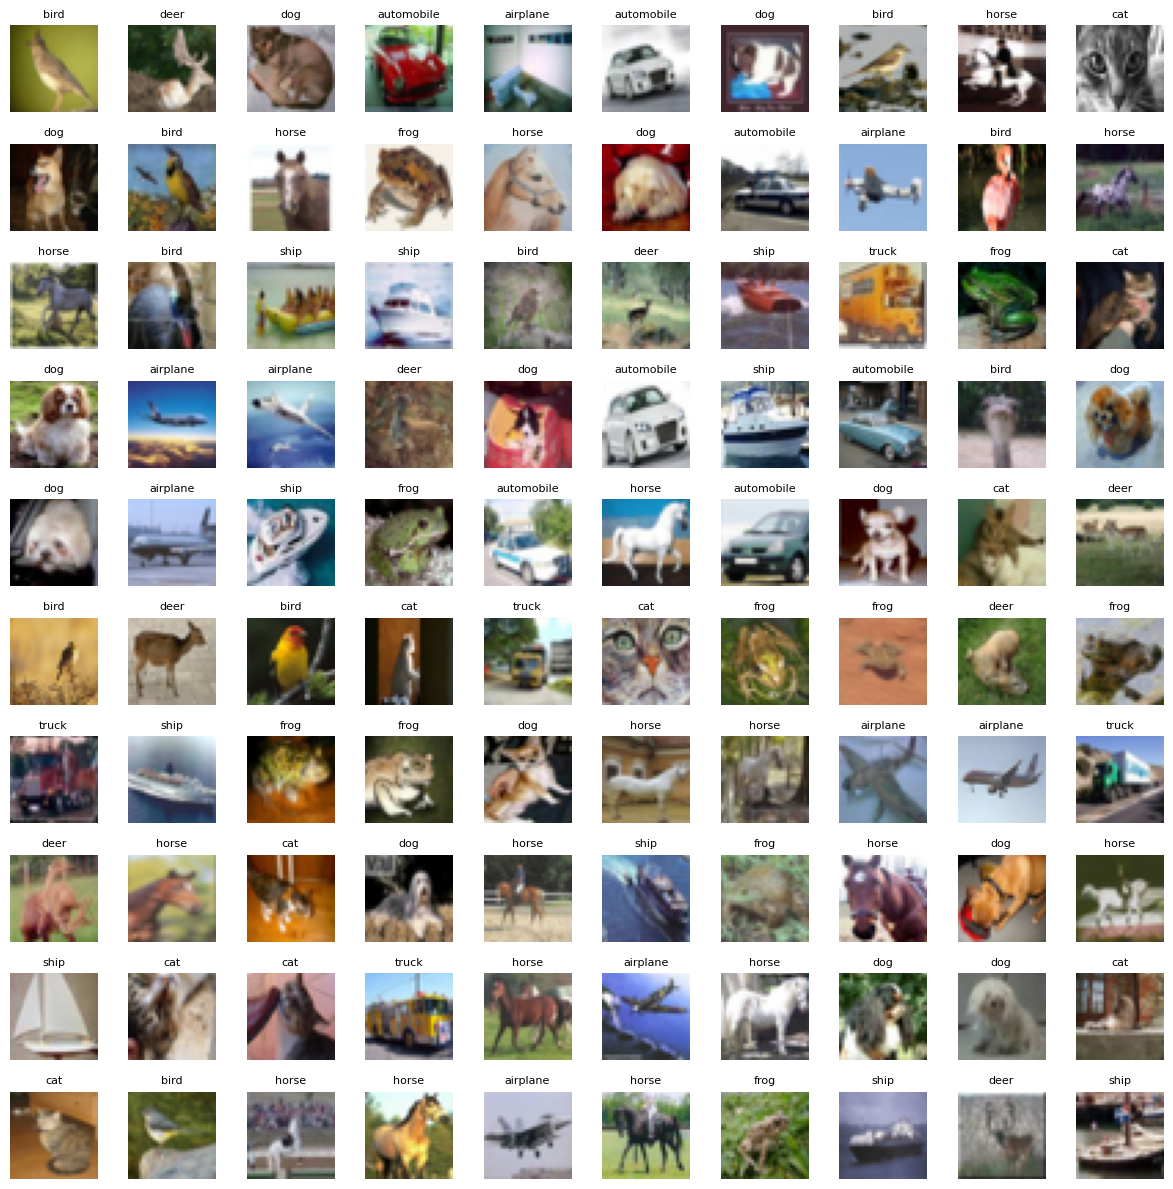

In [16]:
import matplotlib.pyplot as plt
import numpy as np

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(images, labels, label_names, n=100):
    indices = np.random.choice(len(images), n, replace=False)
    plt.figure(figsize=(12, 12))
    
    for i, idx in enumerate(indices):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
        label_index = labels[idx] if isinstance(labels[idx], (int, np.integer)) else np.argmax(labels[idx])
        plt.title(label_names[label_index], fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Call it
plot_sample_images(train_images, train_labels, label_names)

2. MODEL ARCHITECTURE

2.1 In the Model architecture it´s the step where we design the neural network we want to create.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
model = Sequential()

In [19]:
model = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)])

2.2 Convolution and Pooling. Using tiny filters, the model looks for things like edges, lines, and simple shapes. Thanks to convolution (we detect the patters) and for poolint (keeping only the strongest signal)

In [20]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\macat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2.3 Second Convolution & Pooling. We added another layer, this time with 64 filters. More filters, the ability to detect more complex shapes. This way the model sees more than just edges, but parts of the object. 

In [21]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

2.4 Flatten: We now transform everything we’ve seen into a list of numbers so the next layers can make a decision

In [23]:
model.add(Flatten())

2.5 Dense. This layer acts like the brain. It connects everything seen so far and tries to make sense of it. 

2.6 Dropout to prevent Overfitting. 

In [24]:
model.add(Dense(128, activation='relu')),
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

3. Model Training

3.1 Preparing the labels for training

In [25]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

3.2 EarlyStopping to ensure to stop the training if it doesn´t improve for 5 epochs. 

In [26]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
model.compile(
    optimizer='adam',                      
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images, y_train,
    validation_data=(test_images, y_test),
    epochs=30,
    batch_size=64*3,
    #callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 126s 447ms/step - accuracy: 0.1426 - loss: 2.2527 - val_accuracy: 0.2723 - val_loss: 2.0175
Epoch 2/30
261/261 ━━━━━━━━━━━━━━━━━━━━ 87s 333ms/step - accuracy: 0.2943 - loss: 1.9621 - val_accuracy: 0.3580 - val_loss: 1.8050
Epoch 3/30


3.4 Plot Accuracy and Loss Over Epoch

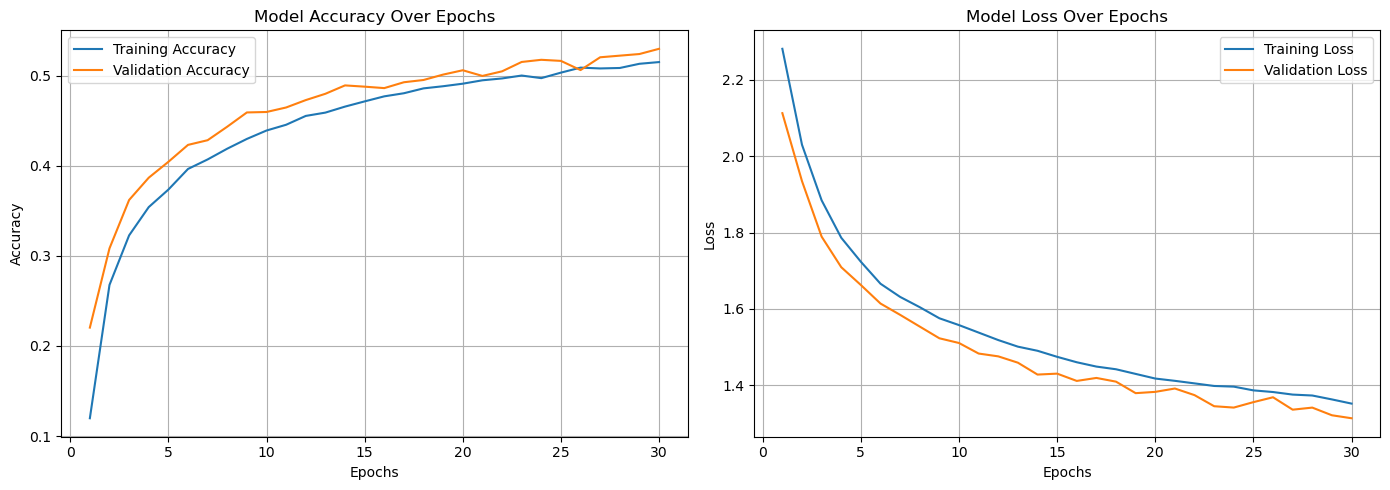

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- These plots help visualize how well the model is training over time. 
- We can see that training accuracy steadily increases from 40% to over 80% across 14 epochs. This is great as we want to have higher training accuracy vs the validation accuracy. This means the model is generalizing well. 

3.5 Saving the model 

In [ ]:
model.save('cifar10_cnn_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('cifar10_cnn_model.h5')

4. Model Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

4.1 After loading the corresponding libraries, we need to load the trained model

In [ ]:
model = load_model("cifar10_cnn_model.h5")

4.3 Testing Accuracy of the model. This helps to know if it´s good the model. 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 3s - 11ms/step - accuracy: 0.5297 - loss: 1.3136
Test accuracy: 0.5297
Test loss: 1.3136


My model is good, but can be improved. The way I can do that is to add data argumentation, add BatchNormalization etc. For now I´ll keep working on this training model. 

4.3 Classification Metrics
- Precision = out of all predicted X, how many were correct?

- Recall = out of all actual X, how many were found?

- F1-score = balance between precision and recall (ideal when both are high)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
report = classification_report(y_true, y_pred, target_names=label_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.55      0.62      0.58      1000
  automobile       0.61      0.65      0.63      1000
        bird       0.44      0.35      0.39      1000
         cat       0.42      0.29      0.35      1000
        deer       0.47      0.47      0.47      1000
         dog       0.47      0.41      0.44      1000
        frog       0.55      0.62      0.59      1000
       horse       0.54      0.64      0.59      1000
        ship       0.59      0.67      0.63      1000
       truck       0.57      0.57      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



- Ship, automobile, and airplane have good precision & recall — the model distinguishes them well.
- Frog and horse also show high recall — model often finds them correctly
- Bird and cat have low recall and precision — model is confused.

4.4 Confusion Matrix
Helps to detect class-level weaknesses that pure accuracy hides. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


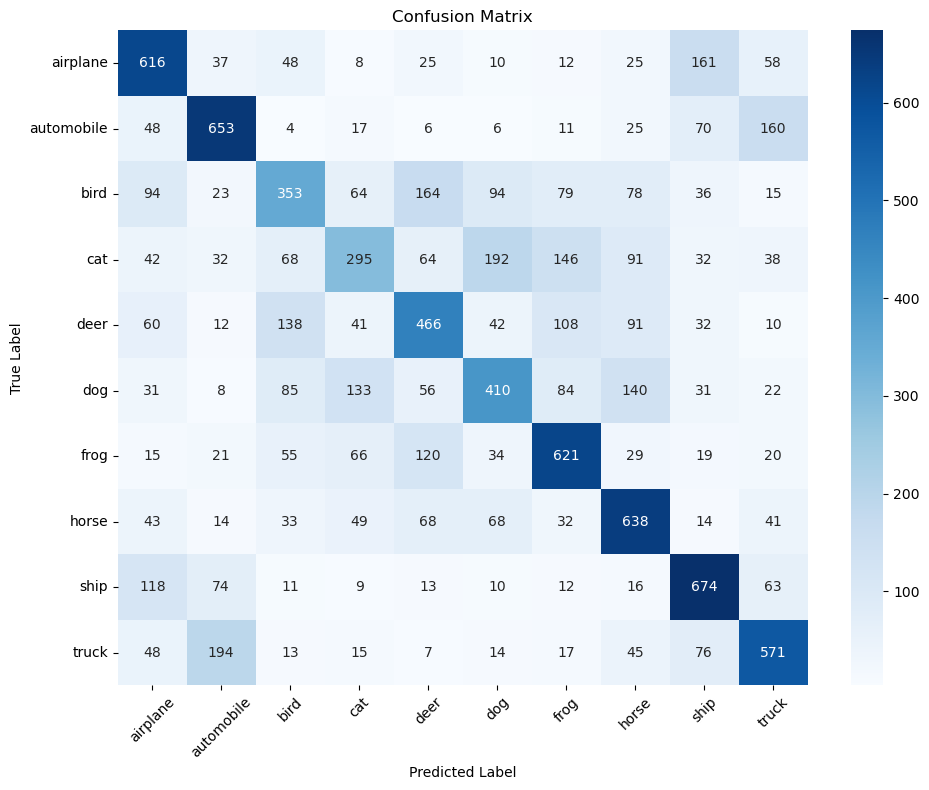

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


We can conclude that cats & dogs are being mixed. 